In [47]:
def plotrawsweep(fname, sweepnumber):
    import numpy as np
    from quantities import kHz, ms, nA, s, uV
    from neo.io import AxonIO
    import matplotlib.pyplot as plt
    %matplotlib inline  
    
    r = AxonIO(filename=fname)
    block = r.read()[0] # read the entire file > a Block
    
    #grab sweep
    asig = block.segments[sweepnumber].analogsignals[0]
    times = asig.times.rescale('s').magnitude
    #set start time to zero
    times = times-times[0]
    #asig = asig.rescale('pA').magnitude
    plt.plot(times, asig)

In [54]:
def plotsweeps(fname):
    import numpy as np
    from quantities import kHz, ms, nA, s, uV
    from neo.io import AxonIO
    import matplotlib.pyplot as plt
    %matplotlib inline  
    
    r = AxonIO(filename=fname)
    block = r.read()[0] # read the entire file > a Block
    
    #grab sweeps
    #sweep 1
    asig = block.segments[0].analogsignals[0]
    times = asig.times.rescale('s').magnitude
    #set start time to zero
    times = times-times[0]
    #asig = asig.rescale('pA').magnitude
    plt.plot(times, asig, alpha=0.3, color='grey')

    #sweep 2
    asig = block.segments[1].analogsignals[0]
    times = asig.times.rescale('s').magnitude
    #set start time to zero
    times = times-times[0]
    #asig = asig.rescale('pA').magnitude
    plt.plot(times, asig, alpha=0.3, color='grey')

    #sweep 3
    #grab a sweep
    asig = block.segments[2].analogsignals[0]
    times = asig.times.rescale('s').magnitude
    #set start time to zero
    times = times-times[0]
    #asig = asig.rescale('pA').magnitude
    plt.plot(times, asig, alpha=0.3, color='grey')

    #average 3 sweeps
    avg = np.mean([seg.analogsignals[0] for seg in block.segments], axis=0)
    #print(avg)
    
    plt.plot(times, avg)

In [55]:
date = '160120'
datef2 = '1612'

##read in the file so we can see which SAC recording we are looking at
f = open('../data/ChatCreChR2/' + date + '.m')
text = f.read()
print(text)

160120 p57 ChatCre/Chr2 mouse

Light Dissection 
50mL ACSF with: 
   20uL DNQX
   50uL AP5
   100uL LAP4
   12.5uL GABAzine

   
No orientation on the retina

Patch SACs, fill with ALexa 594, and then stim at diff dendritic locations 
455nm LED 


SAC1
7.2mohm pipette
CM = 14
Rm = 550M
Ra 67 M

%centered on soma
%000 shutter was closed
showSpots_notCentered('num_trials',3,'delay_time',2,'up_time',1,'down_time',7,'radius',333);

%001
showSpots_notCentered('num_trials',3,'delay_time',2,'up_time',1,'down_time',7,'radius',333);

%002
showSpots_notCentered('num_trials',3,'delay_time',2,'up_time',1,'down_time',7,'radius',83);

%003 centered on soma but focused on dendrites
showSpots_notCentered('num_trials',3,'delay_time',2,'up_time',1,'down_time',7,'radius',83);

%005 centered on the end of the dendrites
showSpots_notCentered('num_trials',3,'delay_time',2,'up_time',1,'down_time',7,'radius',83);

%006 centered on the end of the dendrites hp = +12
%responses are not synched. first one happend

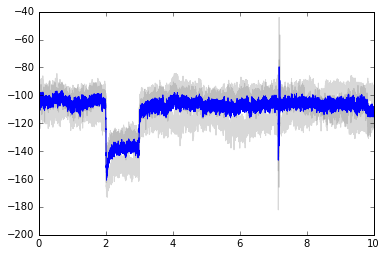

In [56]:
condition = '0021'
fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'

plotsweeps(fname)

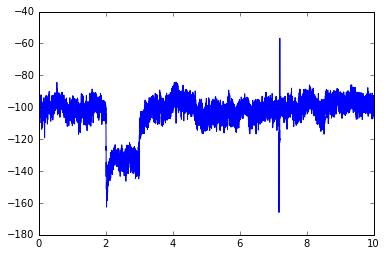

In [57]:
plotrawsweep(fname,0)

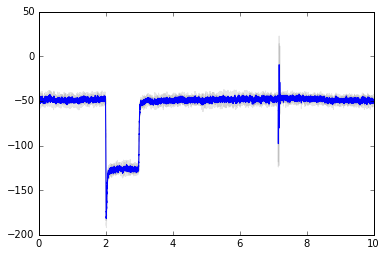

In [42]:
import numpy as np
from quantities import kHz, ms, nA, s, uV

#grab sweeps
#sweep 1
asig = block.segments[0].analogsignals[0]
times = asig.times.rescale('s').magnitude
#set start time to zero
times = times-times[0]
#asig = asig.rescale('pA').magnitude
plt.plot(times, asig, alpha=0.2, color='grey')

#sweep 2
asig = block.segments[1].analogsignals[0]
times = asig.times.rescale('s').magnitude
#set start time to zero
times = times-times[0]
#asig = asig.rescale('pA').magnitude
plt.plot(times, asig, alpha=0.2, color='grey')

#sweep 3
#grab a sweep
asig = block.segments[2].analogsignals[0]
times = asig.times.rescale('s').magnitude
#set start time to zero
times = times-times[0]
#asig = asig.rescale('pA').magnitude
plt.plot(times, asig, alpha=0.2, color='grey')


avg = np.mean([seg.analogsignals[0] for seg in block.segments], axis=0)
#print(avg)
plt.plot(times, avg)

In [61]:
import numpy as np
import quantities as pq
from matplotlib import pyplot

fig = pyplot.figure()

for seg in block.segments:
    #fig = pyplot.figure()
    #ax1 = fig.add_subplot(2, 1, 1)
    #ax2 = fig.add_subplot(2, 1, 2)
    #ax1.set_title(seg.file_origin)
    #mint = 0 * pq.s
    #maxt = np.inf * pq.s
    #for i, asig in enumerate(seg.analogsignals):
    #    times = asig.times.rescale('s').magnitude
    #    asig = asig.rescale('pA').magnitude
    #    ax1.plot(times, asig)

    #trains = [st.rescale('s').magnitude for st in seg.spiketrains]
    #colors = pyplot.cm.jet(np.linspace(0, 1, len(seg.spiketrains)))
    #ax2.eventplot(trains, colors=colors)

pyplot.show()

IndentationError: expected an indented block (<ipython-input-61-a31ccddc6652>, line 23)

In [20]:
avg = np.mean([seg.analogsignals[5] for seg in block.segments[::2]], axis=1)
plt.plot(avg)

IndexError: list index out of range

In [15]:
# -*- coding: utf-8 -*-
"""
This is an example for reading files with neo.io
"""

import urllib

import neo


# Plexon files
distantfile = 'https://portal.g-node.org/neo/plexon/File_plexon_3.plx'
localfile = './File_plexon_3.plx'
urllib.urlretrieve(distantfile, localfile)

#create a reader
reader = neo.io.PlexonIO(filename='File_plexon_3.plx')
# read the blocks
blks = reader.read(cascade=True, lazy=False)
print blks
# acces to segments
for blk in blks:
    for seg in blk.segments:
        print seg
        for asig in seg.analogsignals:
            print asig
        for st in seg.spiketrains:
            print st


# CED Spike2 files
distantfile = 'https://portal.g-node.org/neo/spike2/File_spike2_1.smr'
localfile = './File_spike2_1.smr'
urllib.urlretrieve(distantfile, localfile)

#create a reader
reader = neo.io.Spike2IO(filename='File_spike2_1.smr')
# read the block
bl = reader.read(cascade=True, lazy=False)[0]
print bl
# acces to segments
for seg in bl.segments:
    print seg
    for asig in seg.analogsignals:
        print asig
    for st in seg.spiketrains:
        print st

[ 1630.859375    1525.87890625  1389.16015625 ...,     0.             0.
     0.        ] V
[  3.00000003e-03   1.40000004e-02   2.36000009e-02   3.40000018e-02
   4.36666682e-02   6.37333319e-02   8.37333351e-02   1.03799999e-01
   1.13399997e-01   1.23599999e-01   1.34533331e-01   1.63800001e-01
   1.94199994e-01   2.03799993e-01   2.13400006e-01   2.23866671e-01
   2.63866663e-01   2.83866674e-01   2.94200003e-01   3.14200014e-01
   3.23866665e-01   3.33466679e-01   3.43800008e-01   3.73133332e-01
   3.74266654e-01   3.83933336e-01   3.94266665e-01   4.04000014e-01
   4.14666653e-01   4.26400006e-01   4.34666663e-01   4.44000006e-01
   4.54800010e-01   4.60200012e-01   4.63933319e-01   4.84066665e-01
   4.94333327e-01   5.13266683e-01   5.24066687e-01   5.64066648e-01
   5.83933353e-01   5.94533324e-01   6.24000013e-01   6.33533359e-01
   6.67866647e-01   7.03999996e-01   7.24266648e-01   7.43466675e-01
   7.64666677e-01   8.04133356e-01   8.14666688e-01   8.44266653e-01
   8.545333

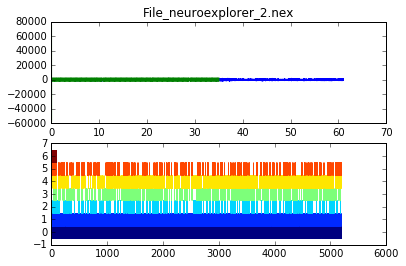

In [16]:

# -*- coding: utf-8 -*-
"""
This is an example for plotting neo object with maplotlib.
"""

import urllib

import numpy as np
import quantities as pq
from matplotlib import pyplot

import neo

url = 'https://portal.g-node.org/neo/'
distantfile = url + 'neuroexplorer/File_neuroexplorer_2.nex'
localfile = 'File_neuroexplorer_2.nex'
urllib.urlretrieve(distantfile, localfile)


reader = neo.io.NeuroExplorerIO(filename='File_neuroexplorer_2.nex')
bl = reader.read(cascade=True, lazy=False)[0]
for seg in bl.segments:
    fig = pyplot.figure()
    ax1 = fig.add_subplot(2, 1, 1)
    ax2 = fig.add_subplot(2, 1, 2)
    ax1.set_title(seg.file_origin)
    mint = 0 * pq.s
    maxt = np.inf * pq.s
    for i, asig in enumerate(seg.analogsignals):
        times = asig.times.rescale('s').magnitude
        asig = asig.rescale('mV').magnitude
        ax1.plot(times, asig)

    trains = [st.rescale('s').magnitude for st in seg.spiketrains]
    colors = pyplot.cm.jet(np.linspace(0, 1, len(seg.spiketrains)))
    ax2.eventplot(trains, colors=colors)

pyplot.show()